In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
import time
import os

from utils import run_exp_strategy

In [2]:
def futu_trade():
    r = run_exp_strategy.RunExpStrategy()
    r.total_timesteps = 200000
    r.exp_id = 7
    r.start_date = "20090101"
    r.split_date = datetime.datetime.now().strftime("%Y%m%d")
    r.end_date = datetime.datetime.now().strftime("%Y%m%d")
    r.a_stock_list = "SSE_50"
    r.h_stock_list = ""
    r.usa_stock_list = ""
    r.baseline_stocks = "SSE_50_INDEX"
    r.no_tushare = True
    r.rerun_test = True
    r.redownload_data = True
    r.need_pe = True
    r.state_init_func = "AllCashStateIntiator"
    r.user_stock_account = "FutuUserStockAccount"
    r.initial_amount = 1000000
    r.hmax = 5000
    r.env_params["hmax"] = r.hmax
    r.trade_env_params["initial_amount"] = r.initial_amount
    r.trade_env_params["initial_amount"] = r.initial_amount
    r.test_model_names = ["ddpg"]
    r.create_exp_dir()
    r.download_stock_data()
    r.download_baseline_stocks()
    r.split_train_and_test_data()
    r.train_model()
    r.test_model()

In [3]:
futu_trade()

2024-11-28 10:46:39,122 | 43321 | [open_context_base.py] _send_init_connect_sync:311: InitConnect ok: conn_id=1, host=127.0.0.1, port=11111, user_id=12316428
2024-11-28 10:48:19,583 | 43321 | [open_context_base.py] on_disconnect:383: Disconnected: conn_id=1
成功添加技术指标
对当前时间段未上市的公司的所有行置零
2024-11-28 10:48:25,770 | 43321 | [open_context_base.py] _send_init_connect_sync:311: InitConnect ok: conn_id=2, host=127.0.0.1, port=11111, user_id=12316428
2024-11-28 10:48:25,808 | 43321 | [open_context_base.py] on_disconnect:383: Disconnected: conn_id=2
2024-11-28 10:48:27,311 | 43321 | [open_context_base.py] _send_init_connect_sync:311: InitConnect ok: conn_id=3, host=127.0.0.1, port=11111, user_id=12316428
加载数据缓存
数据缓存成功!
{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
2024-11-28 10:48:27,366 | 43321 | [open_context_base.py] on_disconnect:383: Disconnected: conn_id=3
before obs=[ 1.00000000e+06  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000

/home/david/miniconda3/envs/stock_rl/lib/python3.10/site-packages/stable_baselines3/common/save_util.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  th_object = th.loa

FutuUserStockAccount cash=912594.279 qty_info={'600690.SH': 100.0, '600016.SH': 2400.0, '601186.SH': 500.0, '600048.SH': 400.0, '600837.SH': 400.0, '600745.SH': 100.0, '601601.SH': 100.0, '601138.SH': 200.0, '600547.SH': 200.0, '601288.SH': 1000.0, '601319.SH': 600.0, '601166.SH': 200.0, '601012.SH': 200.0, '600887.SH': 100.0, '600570.SH': 100.0, '600276.SH': 100.0, '600009.SH': 100.0, '600030.SH': 100.0, '600028.SH': 700.0, '600000.SH': 700.0}
after obs=[ 9.12594250e+05  7.00000000e+02  1.00000000e+02  2.40000000e+03
  7.00000000e+02  1.00000000e+02  0.00000000e+00  0.00000000e+00
  4.00000000e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.00000000e+02  0.00000000e+00  0.00000000e+00  2.00000000e+02
  1.00000000e+02  0.00000000e+00  0.00000000e+00  1.00000000e+02
  0.00000000e+00  1.00000000e+02  4.00000000e+02  1.00000000e+02
  0.00000000e+00  2.00000000e+02  0.00000000e+00  0.00000000e+00
  2.00000000e+02  2.00000000e+02  5.00000000e+02  0.00000000e+00
  0.00000000e+00  1.0

TypeError: cannot unpack non-iterable NoneType object

In [ ]:
r = run_exp_strategy.RunExpStrategy()
r.total_timesteps = 200000
r.exp_id = 7
r.start_date = "20090101"
r.split_date = "20240101"
r.end_date = datetime.datetime.now().strftime("%Y%m%d")
r.a_stock_list = "SSE_50"
r.h_stock_list = ""
r.usa_stock_list = ""
r.baseline_stocks = "SSE_50_INDEX"
r.no_tushare = True
r.rerun_test = True
r.redownload_data = True
r.need_pe = True
r.state_init_func = "AllCashStateIntiator"
r.user_stock_account = "LocalUserStockAccount"
# r.user_stock_account = "FutuUserStockAccount"
r.initial_amount = 1000000
r.hmax = 5000
r.env_params["hmax"] = r.hmax
r.trade_env_params["initial_amount"] = r.initial_amount
r.trade_env_params["initial_amount"] = r.initial_amount
# r.test_model_names = ["ddpg"]
r.create_exp_dir()
r.download_stock_data()
r.download_baseline_stocks()
r.split_train_and_test_data()
r.train_model()
r.test_model()
backtest_table, backtest_curve = r.plot_test_result()
profits = r.get_stock_profit()

2024-11-27 16:57:10,738 | 7168 | [open_context_base.py] _send_init_connect_sync:311: InitConnect ok: conn_id=1, host=127.0.0.1, port=11111, user_id=12316428
2024-11-27 16:58:48,051 | 7168 | [open_context_base.py] on_disconnect:383: Disconnected: conn_id=1
成功添加技术指标
对当前时间段未上市的公司的所有行置零
2024-11-27 16:58:54,024 | 7168 | [open_context_base.py] _send_init_connect_sync:311: InitConnect ok: conn_id=2, host=127.0.0.1, port=11111, user_id=12316428
2024-11-27 16:58:54,170 | 7168 | [open_context_base.py] on_disconnect:383: Disconnected: conn_id=2
2024-11-27 16:58:56,356 | 7168 | [open_context_base.py] _send_init_connect_sync:311: InitConnect ok: conn_id=3, host=127.0.0.1, port=11111, user_id=12316428
2024-11-27 16:58:56,385 | 7168 | [open_context_base.py] on_disconnect:383: Disconnected: conn_id=3
加载数据缓存
数据缓存成功!
{'n_steps': 5, 'ent_coef': 0.01, 'learning_rate': 0.0007}


/home/david/miniconda3/envs/stock_rl/lib/python3.10/site-packages/stable_baselines3/common/save_util.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  th_object = th.loa

EPISODE|STEPS|TERMINAL_REASON|CASH           |TOT_ASSETS     |TERMINAL_REWARD|GAINLOSS_PCT|RETREAT_PROPORTION
   1| 217|Last Date      |￥69,756        |￥1,202,552     |16.94918% |20.25515% |-6.61%    
回测完成!
加载数据缓存
数据缓存成功!
{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
EPISODE|STEPS|TERMINAL_REASON|CASH           |TOT_ASSETS     |TERMINAL_REWARD|GAINLOSS_PCT|RETREAT_PROPORTION


/home/david/miniconda3/envs/stock_rl/lib/python3.10/site-packages/stable_baselines3/common/save_util.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  th_object = th.loa

   1| 217|Last Date      |￥21,924        |￥1,220,846     |17.27939% |22.08455% |-9.61%    
回测完成!
加载数据缓存
数据缓存成功!
{'n_steps': 256, 'ent_coef': 0.01, 'learning_rate': 5e-05, 'batch_size': 256}
EPISODE|STEPS|TERMINAL_REASON|CASH           |TOT_ASSETS     |TERMINAL_REWARD|GAINLOSS_PCT|RETREAT_PROPORTION


/home/david/miniconda3/envs/stock_rl/lib/python3.10/site-packages/stable_baselines3/common/save_util.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  th_object = th.loa

   1| 217|Last Date      |￥43,601        |￥1,140,682     |12.24519% |14.06820% |-3.65%    
回测完成!
加载数据缓存
数据缓存成功!
{'batch_size': 64, 'buffer_size': 100000, 'learning_rate': 0.0001, 'learning_starts': 2000, 'ent_coef': 'auto_0.1'}
EPISODE|STEPS|TERMINAL_REASON|CASH           |TOT_ASSETS     |TERMINAL_REWARD|GAINLOSS_PCT|RETREAT_PROPORTION


/home/david/miniconda3/envs/stock_rl/lib/python3.10/site-packages/stable_baselines3/common/save_util.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  th_object = th.loa

   1| 217|Last Date      |￥78,936        |￥1,255,529     |23.40059% |25.55294% |-4.30%    
回测完成!
加载数据缓存
数据缓存成功!
{'batch_size': 100, 'buffer_size': 1000000, 'learning_rate': 0.001}
EPISODE|STEPS|TERMINAL_REASON|CASH           |TOT_ASSETS     |TERMINAL_REWARD|GAINLOSS_PCT|RETREAT_PROPORTION


/home/david/miniconda3/envs/stock_rl/lib/python3.10/site-packages/stable_baselines3/common/save_util.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  th_object = th.loa

   1| 217|Last Date      |￥28,487        |￥1,234,405     |18.33010% |23.44054% |-10.22%   
回测完成!


In [ ]:
df0 = profits['ddpg'][0]
df0

,stock_code,date,profits
0,600000.SH,2024-01-02,0.0
1,600000.SH,2024-01-03,0.0
2,600000.SH,2024-01-04,0.0
3,600000.SH,2024-01-05,0.0
4,600000.SH,2024-01-08,0.0
...,...,...,...
10895,603986.SH,2024-11-21,0.0
10896,603986.SH,2024-11-22,0.0
10897,603986.SH,2024-11-25,0.0
10898,603986.SH,2024-11-26,0.0


In [ ]:
df1 = profits['ddpg'][1]
df1

,stock_code,total_profit
4,600030.SH,53617.000
37,601601.SH,53351.000
8,600050.SH,34418.840
38,601628.SH,33557.000
28,601166.SH,28311.000
9,600104.SH,24370.713
5,600031.SH,22231.000
6,600036.SH,21767.200
15,600570.SH,17587.400
7,600048.SH,17346.440


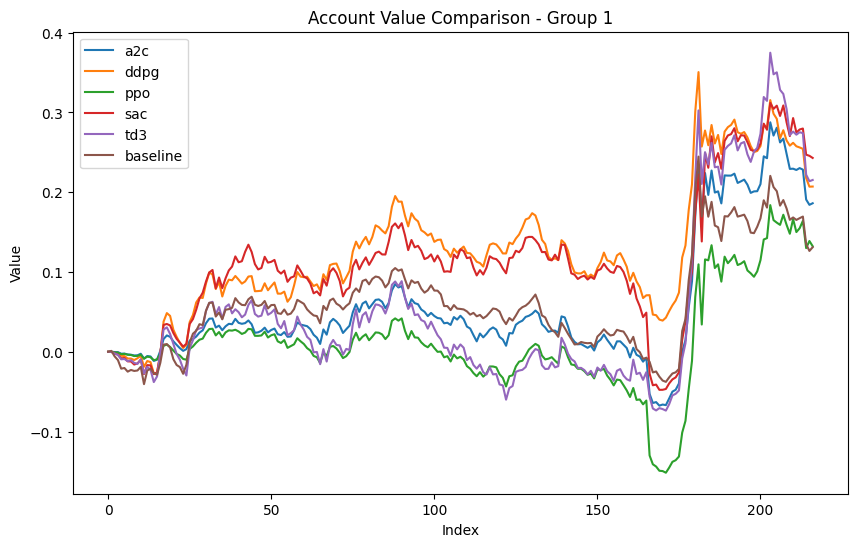

In [ ]:
plt.figure(figsize=(10, 6))
for col in backtest_curve.columns:
    plt.plot(backtest_curve.index, backtest_curve[col], label=col)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Account Value Comparison - Group 1')
plt.legend()
plt.show()

In [ ]:
df = pd.DataFrame(backtest_table).T
df

,累计收益率,最大回撤率,年化收益率,年化波动率,Sharpe比率,Omega比率
baseline,14.55%,-12.91%,17.00%,19.31%,88.06%,119.88%
a2c,18.62%,-14.04%,21.94%,19.95%,109.93%,126.13%
ddpg,20.72%,-13.06%,24.44%,20.71%,118.03%,124.71%
ppo,13.24%,-18.57%,15.53%,22.26%,69.78%,118.78%
sac,24.30%,-17.99%,28.74%,24.43%,117.64%,126.41%
td3,21.54%,-14.90%,25.42%,26.27%,96.78%,120.80%
